In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn2_unweighted, venn2_circles
from matplotlib_venn import venn3, venn3_circles
import scipy.stats as stats

## Load in HPO data

In [2]:
HPO = "HPO/phenotype_to_genes_V1268_OMIMandORPHA.txt_matrix.txt.save"

In [3]:
colls = "q-.HP:0045081.HP:0000002.HP:0012649.HP:0012649.HP:0030972.HP:0030972.HP:0030972.HP:0001626.HP:0012211.HP:0012649.HP:0000924.HP:0002664.HP:0012649.HP:0012649.HP:0000708.HP:0000708.HP:0004305.HP:0031888.HP:0031886.HP:0003107.HP:0003107.HP:0002664.HP:0020064.HP:0031850.HP:0001903.HP:0040088.HP:0025546.HP:0011902.HP:0025065.HP:0012310.HP:0011876.HP:0011991.HP:0011873.HP:0001877.HP:0001877.HP:0011893.HP:0012649.HP:0000819.HP:0032436.HP:0012759.HP:0007373.HP:0002664.HP:0002664"

In [4]:
#notfound HP:0031806

In [5]:
cols_list = colls.split(".")

In [6]:
cols_list_filtered = []
for hpo in cols_list:
    if hpo not in cols_list_filtered:
        cols_list_filtered.append(hpo)

In [7]:
len(cols_list_filtered)

31

In [8]:
data = pd.read_csv(HPO, sep="\t")

In [9]:
data = data[cols_list_filtered]

In [10]:
data

,q-,HP:0045081,HP:0000002,HP:0012649,HP:0030972,HP:0001626,HP:0012211,HP:0000924,HP:0002664,HP:0000708,...,HP:0012310,HP:0011876,HP:0011991,HP:0011873,HP:0001877,HP:0011893,HP:0000819,HP:0032436,HP:0012759,HP:0007373
0,ENSG00000000003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ENSG00000000005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ENSG00000000419,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,ENSG00000000457,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ENSG00000000460,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56430,ENSG00000283117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56431,ENSG00000283118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56432,ENSG00000283122,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
56433,ENSG00000283123,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
data.set_index('q-', inplace=True)

In [12]:
data.head(5)

,HP:0045081,HP:0000002,HP:0012649,HP:0030972,HP:0001626,HP:0012211,HP:0000924,HP:0002664,HP:0000708,HP:0004305,...,HP:0012310,HP:0011876,HP:0011991,HP:0011873,HP:0001877,HP:0011893,HP:0000819,HP:0032436,HP:0012759,HP:0007373
q-,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSG00000000005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSG00000000419,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
ENSG00000000457,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSG00000000460,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
data.shape

(56435, 30)

In [14]:
hpo_genes = data.index
hpo_genes

Index(['ENSG00000000003', 'ENSG00000000005', 'ENSG00000000419',
       'ENSG00000000457', 'ENSG00000000460', 'ENSG00000000938',
       'ENSG00000000971', 'ENSG00000001036', 'ENSG00000001084',
       'ENSG00000001167',
       ...
       'ENSG00000283096', 'ENSG00000283098', 'ENSG00000283101',
       'ENSG00000283103', 'ENSG00000283108', 'ENSG00000283117',
       'ENSG00000283118', 'ENSG00000283122', 'ENSG00000283123',
       'ENSG00000283125'],
      dtype='object', name='q-', length=56435)

## Load in genes

In [15]:
#all genes

#height
#gene_list = r"C:/Users/Pin/Desktop/Execute_methods/DEPICT/results/HeightSNPs_5e8_01_1000kb_200_geneprioritization.txt"
#Prostate cancer
gene_list = r"C:/Users/Pin/Desktop/Execute_methods/DEPICT/results/PC_5e6_1000kb_r2_01_geneprioritization.txt"
#iritated bowl disease
#gene_list = r"C:/Users/Pin/Desktop/Execute_methods/DEPICT/results/IBD_5e6_1000kb_r2_01_geneprioritization.txt"
depict_results = pd.read_csv(gene_list, sep="\t")

In [16]:
height_HPO = 'HP:0000002'
PC_HPO = 'HP:0002664'
IBD_HPO = 'HP:0012649'
file_hpo = PC_HPO

In [17]:
depict_results.columns = depict_results.columns.str.strip()
depict_results.columns = [c.replace(" ", "_") for c in depict_results.columns]

In [18]:
for i in depict_results.columns:
    
    if depict_results[i].dtypes == "object":
        
        #depict_results[i] = depict_results[i].astype("str")
        depict_results[i] = depict_results[i].map(str.strip)
    else:
        pass

In [19]:
genes_file = "C:/Users/Pin/Desktop/Execute_methods/DEPICT/data/Genes.txt"
genes_df = pd.read_csv(genes_file, names=["Ensembl_Gene_ID"])

In [20]:
len(depict_results["Ensembl_Gene_ID"])

343

In [21]:
depict_results["Ensembl_Gene_ID"]

0      ENSG00000124766
1      ENSG00000100290
2      ENSG00000172977
3      ENSG00000143614
4      ENSG00000160741
            ...       
338    ENSG00000197444
339    ENSG00000186889
340    ENSG00000178467
341    ENSG00000233930
342    ENSG00000170382
Name: Ensembl_Gene_ID, Length: 343, dtype: object

In [22]:
depict_results = pd.concat([depict_results, genes_df], axis=0, ignore_index=True).drop_duplicates()

In [23]:
len(depict_results["Ensembl_Gene_ID"])

20340

In [24]:
depict_results = depict_results.drop_duplicates(subset="Ensembl_Gene_ID")

In [25]:
len(depict_results["Ensembl_Gene_ID"])

19997

In [26]:
depict_gene_ids = depict_results["Ensembl_Gene_ID"].values
depict_gene_ids

array(['ENSG00000124766', 'ENSG00000100290', 'ENSG00000172977', ...,
       'ENSG00000242512', 'ENSG00000100442', 'ENSG00000146834'],
      dtype=object)

In [27]:
depict_results["Ensembl_Gene_ID"].nunique()

19997

In [28]:
depict_gene_ids

array(['ENSG00000124766', 'ENSG00000100290', 'ENSG00000172977', ...,
       'ENSG00000242512', 'ENSG00000100442', 'ENSG00000146834'],
      dtype=object)

## Genes Overlapping NetWas and HPO

In [29]:
overlapping_genes_data = data[data.index.isin(depict_gene_ids)]
print(overlapping_genes_data.index)
overlapping_genes = overlapping_genes_data.index
total_overlap = overlapping_genes.shape[0]
print(f"Number of overlapping genes: {total_overlap}")

Index(['ENSG00000000003', 'ENSG00000000005', 'ENSG00000000419',
       'ENSG00000000457', 'ENSG00000000460', 'ENSG00000000938',
       'ENSG00000000971', 'ENSG00000001036', 'ENSG00000001084',
       'ENSG00000001167',
       ...
       'ENSG00000259673', 'ENSG00000259687', 'ENSG00000259697',
       'ENSG00000259700', 'ENSG00000259703', 'ENSG00000259705',
       'ENSG00000259724', 'ENSG00000259727', 'ENSG00000259728',
       'ENSG00000259732'],
      dtype='object', name='q-', length=19463)
Number of overlapping genes: 19463


### Take the Significant genes from NetWas

In [30]:
filtered_depict = depict_results[depict_results["Ensembl_Gene_ID"].isin(overlapping_genes)]
# filtered_depict
significant_depict = filtered_depict[filtered_depict["False_discovery_rate_<_5%"] == "Yes"]
significant_depict

,Locus,Nr_of_genes_in_locus,Chromosome_and_position,Ensembl_Gene_ID,Gene_symbol,Nominal_P_value,Gene_closest_to_lead_SNP,Gene_bio-type,Top_cis_eQTL_SNP_(Westra_et_al._Nature_Genetics_2014),False_discovery_rate_<_5%
0,rs2182997,1.0,chr6:21593972-21598847,ENSG00000124766,SOX4,7.899639e-09,true,protein_coding,-,Yes
1,rs5759167,1.0,chr22:43506754-43525718,ENSG00000100290,BIK,1.197388e-08,true,protein_coding,rs5751435,Yes
2,rs2306364,7.0,chr11:65365226-65547496,ENSG00000172977,KAT5,2.361334e-08,false,protein_coding+retained_intron+processed_trans...,-,Yes
3,rs10127983,7.0,chr1:153777201-154127592,ENSG00000143614,GATAD2B,4.064316e-08,false,protein_coding,rs6700115,Yes
4,rs10127983,7.0,chr1:153777201-154127592,ENSG00000160741,CRTC2,7.094192e-08,true,nonsense_mediated_decay+protein_coding+retaine...,rs6672856,Yes
...,...,...,...,...,...,...,...,...,...,...
108,rs2889854,27.0,chr3:48282590-49213918,ENSG00000172037,LAMB2,7.829269e-03,false,retained_intron+protein_coding+processed_trans...,-,Yes
109,rs8093601,1.0,chr18:51677971-51751158,ENSG00000134046,MBD2,8.445909e-03,true,protein_coding,rs12970263;rs1787824,Yes
110,rs4711748,1.0,chr6:43639040-43655545,ENSG00000096080,MRPS18A,1.010824e-02,true,protein_coding,rs9367177,Yes
111,rs17694493,4.0,chr9:21802635-22121096,ENSG00000147889,CDKN2A,1.024598e-02,false,protein_coding+nonsense_mediated_decay+process...,rs2811708,Yes


In [31]:
filtered_depict

,Locus,Nr_of_genes_in_locus,Chromosome_and_position,Ensembl_Gene_ID,Gene_symbol,Nominal_P_value,Gene_closest_to_lead_SNP,Gene_bio-type,Top_cis_eQTL_SNP_(Westra_et_al._Nature_Genetics_2014),False_discovery_rate_<_5%
0,rs2182997,1.0,chr6:21593972-21598847,ENSG00000124766,SOX4,7.899639e-09,true,protein_coding,-,Yes
1,rs5759167,1.0,chr22:43506754-43525718,ENSG00000100290,BIK,1.197388e-08,true,protein_coding,rs5751435,Yes
2,rs2306364,7.0,chr11:65365226-65547496,ENSG00000172977,KAT5,2.361334e-08,false,protein_coding+retained_intron+processed_trans...,-,Yes
3,rs10127983,7.0,chr1:153777201-154127592,ENSG00000143614,GATAD2B,4.064316e-08,false,protein_coding,rs6700115,Yes
4,rs10127983,7.0,chr1:153777201-154127592,ENSG00000160741,CRTC2,7.094192e-08,true,nonsense_mediated_decay+protein_coding+retaine...,rs6672856,Yes
...,...,...,...,...,...,...,...,...,...,...
20335,NaN,NaN,NaN,ENSG00000088808,NaN,NaN,NaN,NaN,NaN,NaN
20336,NaN,NaN,NaN,ENSG00000131116,NaN,NaN,NaN,NaN,NaN,NaN
20337,NaN,NaN,NaN,ENSG00000242512,NaN,NaN,NaN,NaN,NaN,NaN
20338,NaN,NaN,NaN,ENSG00000100442,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
significant_depict_genes = significant_depict["Ensembl_Gene_ID"]
total_significant_genes = significant_depict.shape[0]
print(f"Total number of significant depict genes: {total_significant_genes}")

Total number of significant depict genes: 113


### Loop over HPO terms and print all with a significant p-value

In [33]:
for term in overlapping_genes_data:
    hpo_term_data = overlapping_genes_data.loc[overlapping_genes_data[term] == 1, term]
    hpo_term_genes = hpo_term_data.index
    total_hpo_term_genes = hpo_term_data.shape[0]
    
    tl = overlapping_genes[~overlapping_genes.isin(significant_depict_genes) & ~overlapping_genes.isin(hpo_term_genes)].shape[0]
    
    bl = overlapping_genes[overlapping_genes.isin(significant_depict_genes) & ~overlapping_genes.isin(hpo_term_genes)].shape[0]
    
    tr = overlapping_genes[~overlapping_genes.isin(significant_depict_genes) & overlapping_genes.isin(hpo_term_genes)].shape[0]
    
    br = overlapping_genes[overlapping_genes.isin(significant_depict_genes) & overlapping_genes.isin(hpo_term_genes)].shape[0]

    overlap_key_genes = (br * 100) / total_significant_genes
    
    total = tl + bl + tr + br
    
    metrix = pd.DataFrame({"No HPO": [tl, bl, tl + bl], "Yes HPO": [tr, br, tr + br],
                      "sum": [tl + tr, bl + br, total]})
    metrix.index = ["No GWAS", "Yes GWAS", "sum"]
    

    odds, p_value = stats.fisher_exact(metrix.values[0:2, 0:2])
    if p_value < 0.05:
        print(term)
        print(metrix)
        print(odds, p_value)

HP:0000002
          No HPO  Yes HPO    sum
No GWAS    18306     1044  19350
Yes GWAS     101       12    113
sum        18407     1056  19463
2.083304882212359 0.02139322028060761
HP:0002664
          No HPO  Yes HPO    sum
No GWAS    18697      653  19350
Yes GWAS     102       11    113
sum        18799      664  19463
3.087814911569528 0.0016692361250928813


In [34]:
term = file_hpo

hpo_term_data = overlapping_genes_data.loc[overlapping_genes_data[term] == 1, term]
hpo_term_genes = hpo_term_data.index
total_hpo_term_genes = hpo_term_data.shape[0]
    
tl = overlapping_genes[~overlapping_genes.isin(significant_depict_genes) & ~overlapping_genes.isin(hpo_term_genes)].shape[0]
print(tl)
bl = overlapping_genes[overlapping_genes.isin(significant_depict_genes) & ~overlapping_genes.isin(hpo_term_genes)].shape[0]
print(bl)
tr = overlapping_genes[~overlapping_genes.isin(significant_depict_genes) & overlapping_genes.isin(hpo_term_genes)].shape[0]
print(tr)
br = overlapping_genes[overlapping_genes.isin(significant_depict_genes) & overlapping_genes.isin(hpo_term_genes)].shape[0]
print(br)
overlap_key_genes = (br * 100) / total_significant_genes
    
total = tl + bl + tr + br
    
metrix = pd.DataFrame({"No HPO": [tl, bl, tl + bl], "Yes HPO": [tr, br, tr + br],
                      "sum": [tl + tr, bl + br, total]})
metrix.index = ["No GWAS", "Yes GWAS", "sum"]

metrix
    



18697
102
653
11


,No HPO,Yes HPO,sum
No GWAS,18697,653,19350
Yes GWAS,102,11,113
sum,18799,664,19463


In [35]:
stats.fisher_exact(metrix.values[0:2, 0:2])

(3.087814911569528, 0.0016692361250928813)

In [36]:
len(depict_results)

19997

In [37]:
depict_results.Ensembl_Gene_ID.nunique()

19997

In [38]:
gene_list

'C:/Users/Pin/Desktop/Execute_methods/DEPICT/results/PC_5e6_1000kb_r2_01_geneprioritization.txt'

In [39]:
name = gene_list.rsplit("/",1)[1]
name = name.split("_",1)[0]

In [40]:
name

'PC'

In [41]:
n_hpo_genes = len(hpo_genes)
n_result_genes = len(depict_results)
n_overlap = total_overlap


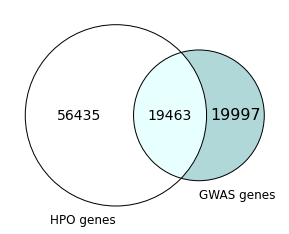

In [43]:
ax1 = plt.gca()


v = venn2(subsets=(n_hpo_genes, n_result_genes, n_overlap),
     set_labels=("HPO genes","GWAS genes"),
     set_colors=("white", "teal"),
     alpha=0.7)
v.get_patch_by_id("10").set_alpha(0.2)
v.get_patch_by_id("11").set_alpha(0.3)
v.get_patch_by_id("01").set_alpha(0.3)

v.get_label_by_id("10").set_fontsize(14)

v.get_label_by_id("11").set_fontsize(14)

v.get_label_by_id("01").set_fontsize(16)

venn2_circles(subsets=(n_hpo_genes, n_result_genes, n_overlap),
             linewidth=1)
#plt.savefig("Depict_total_overlap.png")
plt.show()

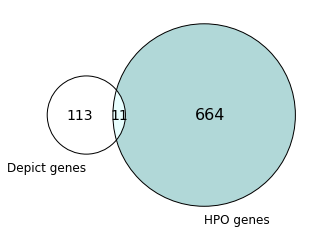

In [44]:
ax = plt.gca()

labels = ["Depict genes", "HPO genes"]

n_hpo = tr + br
n_gwas = bl + br
n_overlap2 = br

v2 = venn2(subsets=(n_gwas, n_hpo, n_overlap2),
     set_labels=(labels),
     set_colors=("white", "teal"),
     alpha=0.7)

v2.get_patch_by_id("10").set_alpha(0.2)
v2.get_patch_by_id("11").set_alpha(0.3)
v2.get_patch_by_id("01").set_alpha(0.3)

v2.get_label_by_id("10").set_fontsize(14)

v2.get_label_by_id("11").set_fontsize(14)

v2.get_label_by_id("01").set_fontsize(16)

venn2_circles(subsets=(n_gwas, n_hpo, n_overlap2),
             linewidth=1)
#plt.savefig("Depict_Height_total_overlap.png")
plt.show()

* * *